[1 0 1] (3,)
weights = [-1.64662448 -0.50039566 -0.22017779]
weights shape (3,)
output =  1.3391216032074169e-01
update to weights = [-2.14662448 -0.50039566 -0.72017779]


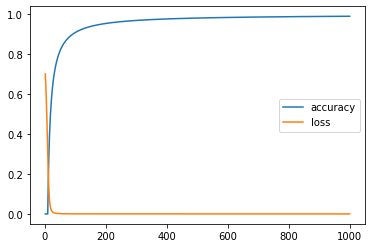

In [15]:
import numpy as np
import matplotlib.pyplot as plt


#### 1.  Preparation ####

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoidprime(x):
    return sigmoid(x) * (1 - sigmoid(x))


#### 2. Data Set  ####


# 1. possible inputs are 1 and 0

input_pairs = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

labels_and = [[0], [0], [0], [1]]
labels_or = [[0], [1], [1], [1]]
labels_nand = [[1], [1], [1], [0]]
labels_nor = [[1], [0], [0], [0]]
labels_xor = [[0], [1], [1], [0]]


#### 3. Perceptron ####


class Perceptron():

    def __init__(self, input_units, learning_rate=1):
        """
        Initializing a perceptron object.

        :param input_units: length of the input units
        :learning_rate: float determining learning rate
        """
        self.weights = np.random.randn(input_units+1)  # + bias
        self.alpha = learning_rate
        self.inputs = None
        self.drive = None

    def forward_step(self, inputs):
        '''
        Computes the net input, weights and biases (drive) and outputs the activation.

        :param inputs: an np array of input values
        :return: float of the activation
        '''
        self.inputs = np.append(inputs, 1)
        self.drive = (self.weights @ self.inputs)  # product of all inputs and their weights + bias
        return sigmoid(self.drive)

    def update(self, delta):
        '''
        updates weights: new parameter = old parameter * alpha learning rate * gradient

        :param delta: error function: target - output * sigmoidprime
        :param self.inputs: last_activaton for weight in question i.e. a(l-1)
        '''
        # compute the gradient from the error term delta. Will be passed to the function in the MLP section
        gradient = delta * self.inputs

        # And then update the parameters using:
        self.weights -= self.alpha * gradient


## Test Perceptron

p = Perceptron(2)
test = p.forward_step(input_pairs[1])
print(p.inputs, p.inputs.shape)


print('weights =', p.weights)
print('weights shape', p.weights.shape)

output = p.forward_step(input_pairs[1])
print('output = ', output)

p.update(delta = 0.5)
print('update to weights =', p.weights)


#### 4. MLP #


class MLP():
    #  Initialize the MLP with 1 hidden layer that has 4 Perceptrons. Initialize 1 output neuron.

    def __init__(self, n_perceptrons):
        '''Initialize a new network, madeup of a hidden layer and an output layer.
        
        :param int n_perceptrons: how many perceptrons per hidden layer
        '''
        self.hidden_perceptrons = [Perceptron(2) for i in range(n_perceptrons)]
        self.output_layer = Perceptron(4)
        self.output = None

    def forward_step(self, inputs):
        '''
        passes the inputs to the perceptrons in respective layer and saves their output

        :param inputs: an np array of input values
        initalizes self.output: vector of floats of the activation values
        '''
        hidden_output = []
        for p in self.hidden_perceptrons:
            hidden_output.append(p.forward_step(inputs))

        self.output = self.output_layer.forward_step(hidden_output)

    def backprop_step(self, target):
        """
        performing backpropagation by computing the delta values passing them to 
        the respective perceptrons 

        :param target: float of desired output
        """

        # compute delta variables for the Perceptron
        delta_last_layer = - (target - output) * 2 * sigmoidprime(self.output_layer.drive)

        delta_hidden_layer = []
        for i in self.hidden_perceptrons:
            delta_hidden_layer.append(sum(delta_last_layer * i.weights) * sigmoidprime(i.drive))

        # compute perceptron updates for output layer and hidden layers
        self.output_layer.update(delta_last_layer)

        for p,d in zip(self.hidden_perceptrons, delta_hidden_layer):
            p.update(d)



#### Training ####


my_MLP = MLP(4)
n_epochs = 1000

predictions = []
accuracy = []
loss = []
threshold = 0.5
input_label_var = 3

target = labels_nand[input_label_var]

for epoch in range(n_epochs):
    my_MLP.forward_step(input_pairs[input_label_var])
    my_MLP.backprop_step(target)
    
    
    if (my_MLP.output > threshold) and (target == [1]):
        predictions.append(1)
    elif (my_MLP.output < threshold) and (target == [1]):
        predictions.append(0)
    elif (my_MLP.output < threshold) and (target == [0]):
        predictions.append(1)
    elif (my_MLP.output > threshold) and (target == [0]):
        predictions.append(0)

    accuracy.append(predictions.count(1)/ len(predictions))

    loss.append((target - my_MLP.output)**2)


#### 6. Visualisation ####

x = np.linspace(1, n_epochs, n_epochs)
y_1 = accuracy
y_2 = loss


plt.plot(x,y_1)
plt.plot(x, y_2)
plt.legend(['accuracy', 'loss'])
plt.show()
   

